In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import performance_metrics, cross_validation

C:\Users\Isabela\AppData\Local\Temp\ipykernel_12452\596591927.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Importing plotly failed. Interactive plots will not work.


In [3]:
dados = pd.read_csv('C:\\Users\\Isabela\\Downloads\\ipeadata[29-01-2024-10-40].csv', parse_dates = ['Data'])

In [4]:
dados.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,NaN
2,1987-05-22,18.55,NaN
3,1987-05-23,NaN,NaN
4,1987-05-24,NaN,NaN


In [5]:
dados.drop('Unnamed: 2', axis = 1, inplace=True)

In [6]:
dados.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,NaN
4,1987-05-24,NaN


In [7]:
dados = dados.rename(columns={'Data': 'ds', 'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366': 'y'})

In [8]:
dados.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,NaN
4,1987-05-24,NaN


In [9]:
dados.shape

(13397, 2)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13397 entries, 0 to 13396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      13397 non-null  datetime64[ns]
 1   y       11092 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 209.5 KB


In [11]:
dados.isnull().sum()

ds       0
y     2305
dtype: int64

In [12]:
dados.dropna(inplace=True)

In [13]:
dados.isnull().sum()

ds    0
y     0
dtype: int64

In [14]:
dados.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63


In [15]:
dados.to_csv('C:\\Users\\Isabela\\Desktop\\tech-challenge4\\ipea_tudo.csv')

In [16]:
dados_2018 = dados[dados['ds'].dt.year > 2018]

In [17]:
dados_2018.head()

,ds,y
11550,2019-01-02,54.06
11551,2019-01-03,54.06
11552,2019-01-04,53.23
11553,2019-01-05,55.64
11555,2019-01-07,57.10


In [18]:
dados_2018.to_csv('C:\\Users\\Isabela\\Desktop\\tech-challenge4\\ipea.csv')

Usando o Prophet para a previsão dos valores
============================================

In [19]:
modelo_prophet = Prophet()

In [20]:
modelo_prophet.fit(dados_2018)

16:55:07 - cmdstanpy - INFO - Chain [1] start processing
16:55:10 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = modelo_prophet.make_future_dataframe(periods=365)

In [22]:
prev = modelo_prophet.predict(future)

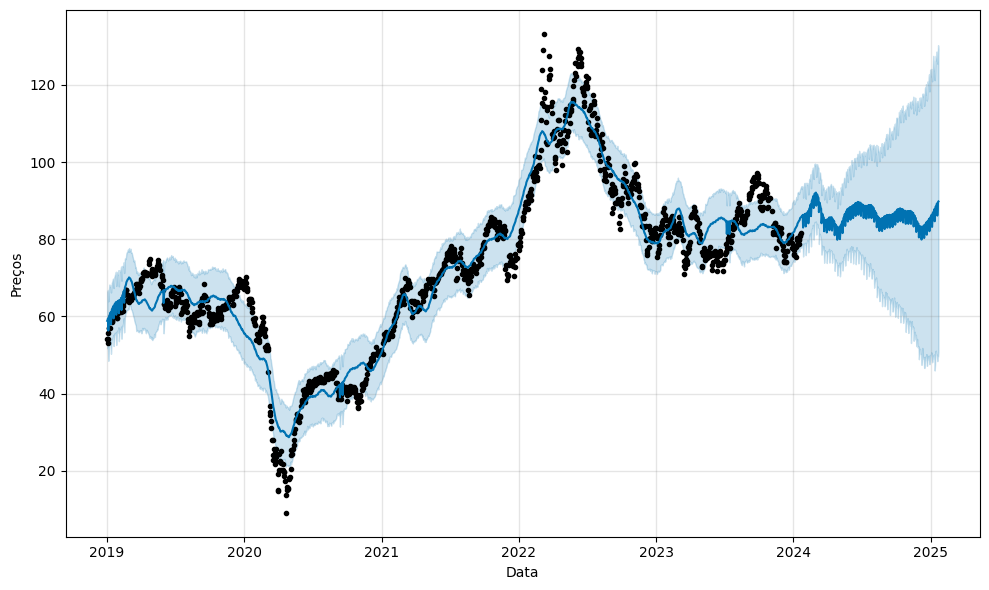

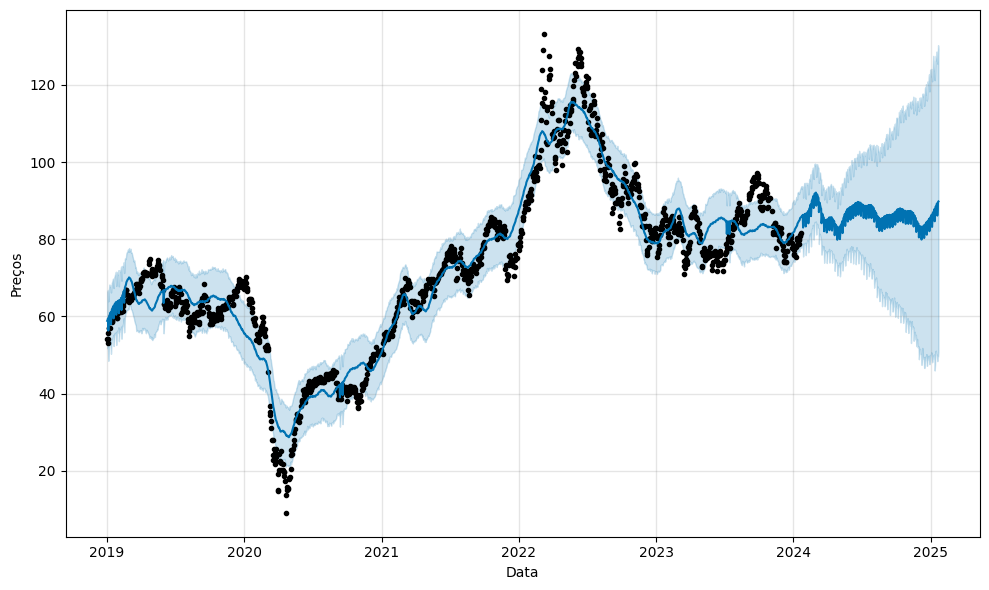

In [23]:
modelo_prophet.plot(prev, xlabel='Data', ylabel='Preços')

In [24]:
df_cv = cross_validation(modelo_prophet, horizon = '100 days')

  0%|          | 0/28 [00:00<?, ?it/s]16:55:17 - cmdstanpy - INFO - Chain [1] start processing
16:55:17 - cmdstanpy - INFO - Chain [1] done processing
16:55:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:55:17 - cmdstanpy - INFO - Chain [1] start processing
16:55:20 - cmdstanpy - INFO - Chain [1] done processing
  4%|▎         | 1/28 [00:04<02:13,  4.93s/it]16:55:21 - cmdstanpy - INFO - Chain [1] start processing
16:55:22 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 2/28 [00:05<01:04,  2.48s/it]16:55:22 - cmdstanpy - INFO - Chain [1] start processing
16:55:23 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 3/28 [00:06<00:44,  1.77s/it]16:55:23 - cmdstanpy - INFO - Chain [1] start processing
16:55:24 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 4/28 [00:07<00:35,  1.46s/it]16:55:24 - cmdstanpy - INFO - Chain [1] start processing


In [25]:
df_metrics = performance_metrics(df_cv)

In [26]:
df_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,11 days,88.659175,9.415900,7.212685,0.113964,0.077382,0.116356,0.433468
1,12 days,96.245880,9.810498,7.565227,0.117219,0.077759,0.119419,0.418315
2,13 days,107.198795,10.353685,8.032898,0.122738,0.080540,0.125605,0.397436
3,14 days,123.519236,11.113921,8.566449,0.130438,0.084850,0.134627,0.391538
4,15 days,135.861302,11.655956,8.991084,0.139329,0.086919,0.144909,0.381795


O modelo de previsão do Prophet apresentou bons valores de rmse, mse e mae, portanto, pode-se considerar que o seu desempenho foi bom o suficiente para ser utilizado nessa projeção.